In [1]:
from requests import get


def get_data(url):
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"date":"date","newCases":"newCasesByPublishDate"}'
    )
    
    raw_data = get_data(endpoint)
print(raw_data)

{'length': 271, 'maxPageLimit': 1000, 'data': [{'date': '2020-09-29', 'newCases': 5651}, {'date': '2020-09-28', 'newCases': 3316}, {'date': '2020-09-27', 'newCases': 4800}, {'date': '2020-09-26', 'newCases': 4639}, {'date': '2020-09-25', 'newCases': 5723}, {'date': '2020-09-24', 'newCases': 5632}, {'date': '2020-09-23', 'newCases': 5083}, {'date': '2020-09-22', 'newCases': 4187}, {'date': '2020-09-21', 'newCases': 3754}, {'date': '2020-09-20', 'newCases': 3279}, {'date': '2020-09-19', 'newCases': 3638}, {'date': '2020-09-18', 'newCases': 3771}, {'date': '2020-09-17', 'newCases': 2788}, {'date': '2020-09-16', 'newCases': 3396}, {'date': '2020-09-15', 'newCases': 2649}, {'date': '2020-09-14', 'newCases': 2259}, {'date': '2020-09-13', 'newCases': 2837}, {'date': '2020-09-12', 'newCases': 3008}, {'date': '2020-09-11', 'newCases': 3143}, {'date': '2020-09-10', 'newCases': 2578}, {'date': '2020-09-09', 'newCases': 2286}, {'date': '2020-09-08', 'newCases': 2094}, {'date': '2020-09-07', 'newCa

In [12]:
data = raw_data['data']
data

[{'date': '2020-09-29', 'newCases': 5651},
 {'date': '2020-09-28', 'newCases': 3316},
 {'date': '2020-09-27', 'newCases': 4800},
 {'date': '2020-09-26', 'newCases': 4639},
 {'date': '2020-09-25', 'newCases': 5723},
 {'date': '2020-09-24', 'newCases': 5632},
 {'date': '2020-09-23', 'newCases': 5083},
 {'date': '2020-09-22', 'newCases': 4187},
 {'date': '2020-09-21', 'newCases': 3754},
 {'date': '2020-09-20', 'newCases': 3279},
 {'date': '2020-09-19', 'newCases': 3638},
 {'date': '2020-09-18', 'newCases': 3771},
 {'date': '2020-09-17', 'newCases': 2788},
 {'date': '2020-09-16', 'newCases': 3396},
 {'date': '2020-09-15', 'newCases': 2649},
 {'date': '2020-09-14', 'newCases': 2259},
 {'date': '2020-09-13', 'newCases': 2837},
 {'date': '2020-09-12', 'newCases': 3008},
 {'date': '2020-09-11', 'newCases': 3143},
 {'date': '2020-09-10', 'newCases': 2578},
 {'date': '2020-09-09', 'newCases': 2286},
 {'date': '2020-09-08', 'newCases': 2094},
 {'date': '2020-09-07', 'newCases': 2528},
 {'date': '

In [13]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,date,newCases
0,2020-09-29,5651
1,2020-09-28,3316
2,2020-09-27,4800
3,2020-09-26,4639
4,2020-09-25,5723


In [14]:
print(df.dtypes)

# Convert date column to datetime objects
df['date'] = pd.to_datetime(df['date'])

print(df.dtypes)
df.head()

date        object
newCases     int64
dtype: object
date        datetime64[ns]
newCases             int64
dtype: object


,date,newCases
0,2020-09-29,5651
1,2020-09-28,3316
2,2020-09-27,4800
3,2020-09-26,4639
4,2020-09-25,5723


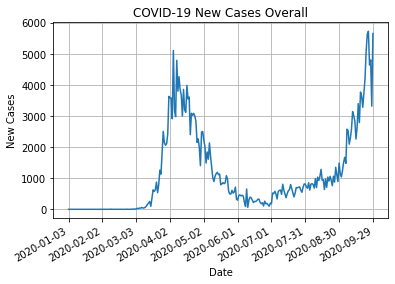

In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
x = df['date']
y = df['newCases']

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='Date', ylabel='New Cases',
       title='COVID-19 New Cases Overall')
ax.grid()

# Find good spacing for date markers
mark = x.iloc[::30]
plt.xticks(mark)
fig.autofmt_xdate()

plt.show()

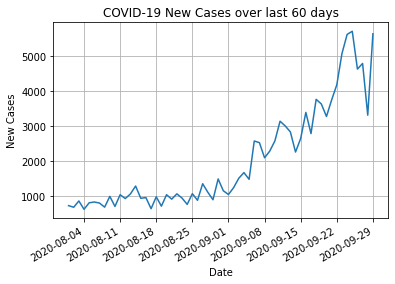

In [28]:
df60 = df.head(60)

# Data for plotting
x = df60['date']
y = df60['newCases']

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='Date', ylabel='New Cases',
       title='COVID-19 New Cases over last 60 days')
ax.grid()

# Find good spacing for date markers
mark = x.iloc[::7]
plt.xticks(mark)
fig.autofmt_xdate()

plt.show()